Importacion de Librerias

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importacion de 60 datos excel

In [10]:
df = pd.read_excel("C:/Users/walex/Downloads/60 datos.xlsx", engine="openpyxl")

columna = "Matematicas "  
datos = df[columna].dropna()  
print(df)


    Matematicas 
0             22
1             23
2             24
3             24
4             25
5             26
6             26
7             27
8             28
9             28
10            29
11            30
12            30
13            31
14            31
15            32
16            32
17            33
18            33
19            33
20            33
21            34
22            34
23            35
24            35
25            35
26            36
27            36
28            36
29            36
30            36
31            36
32            37
33            37
34            37
35            38
36            38
37            38
38            38
39            38
40            39
41            39
42            39
43            40
44            40
45            40
46            41
47            41
48            41
49            41
50            42
51            42
52            43
53            44
54            44
55            47
56            47
57            

Amplitud de los Datos (Notas Estudiantes)

In [28]:
a= datos.max() - datos.min()
k = int(np.round(np.sqrt(a)))  # Redondeamos al entero más cercano
h = int(np.round(a/k))
media = datos.mean()  # Calcula la media
mediana = datos.median()
moda = datos.mode().tolist()


print(f"Amplitud total global de todos los datos numéricos: {a}")
print(f"Número de clases: {k}")
print(f"La extension del Intervalo es:{h}")
print(f"Media de '{columna}': {media:.2f}")
print(f"Media de '{columna}': {mediana:.2f}")
print(f"La moda es: {moda}")

Amplitud total global de todos los datos numéricos: 28
Número de clases: 5
La extension del Intervalo es:6
Media de 'Matematicas ': 35.82
Media de 'Matematicas ': 36.00
La moda es: [36]


Creacion Tabla de Frecuencias

In [13]:
# Generar los límites de los intervalos
bins = [datos.min() + i * h for i in range(k + 1)]

# Crear la tabla de frecuencias
tabla_frecuencias = pd.cut(
    datos,
    bins=bins,
    right=False,  # Intervalo cerrado por la izquierda: [a, b)
    include_lowest=True
).value_counts().sort_index().reset_index()

# Renombrar columnas
tabla_frecuencias.columns = ["Intervalo", "Frecuencia Absoluta"]


tabla_frecuencias["Frecuencia Relativa"] = (
    tabla_frecuencias["Frecuencia Absoluta"] / datos
)
tabla_frecuencias["Frecuencia Acumulada"] = (
    tabla_frecuencias["Frecuencia Absoluta"].cumsum()
)

print(tabla_frecuencias)

  Intervalo  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0  [22, 28)                    8             0.363636                     8
1  [28, 34)                   13             0.565217                    21
2  [34, 40)                   22             0.916667                    43
3  [40, 46)                   12             0.500000                    55
4  [46, 52)                    5             0.200000                    60


 Histograma

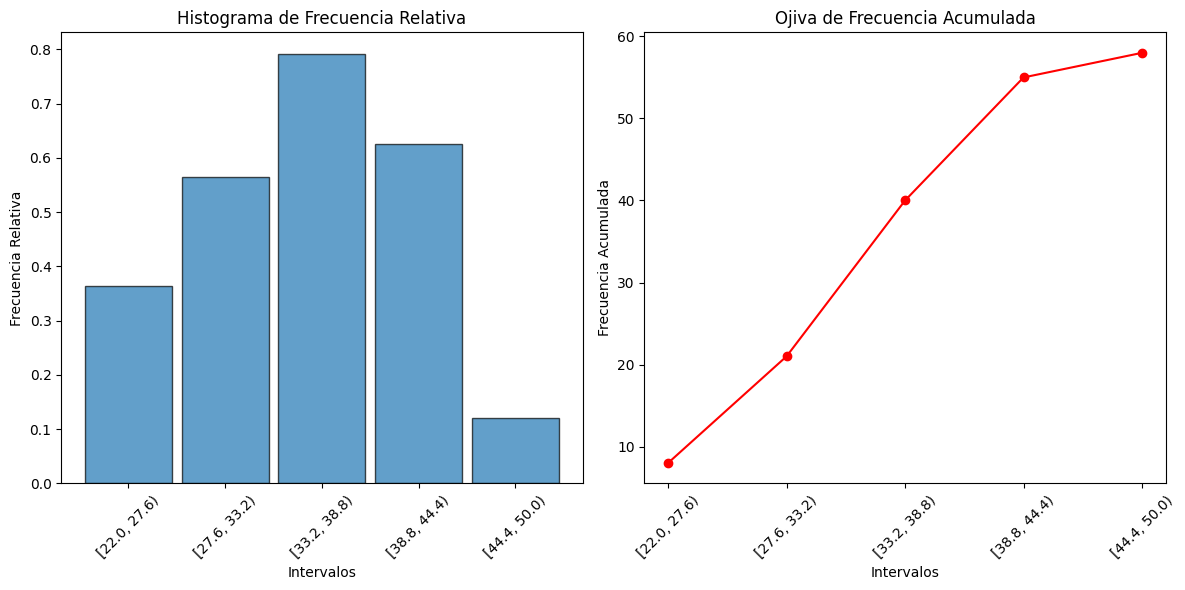

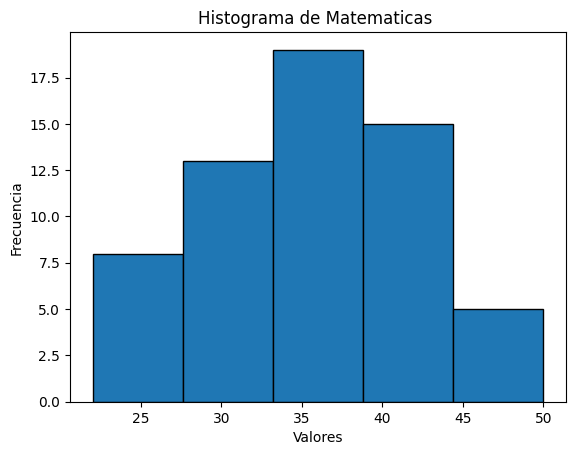

In [ ]:
# Crear intervalos y tabla de frecuencias
bins = np.linspace(datos.min(), datos.max(), k + 1)
tabla_frecuencias = (
    pd.cut(datos, bins=bins, right=False, include_lowest=True)
    .value_counts()
    .sort_index()
    .reset_index()
)
tabla_frecuencias.columns = ["Intervalo", "Frecuencia Absoluta"]
tabla_frecuencias["Frecuencia Relativa"] = tabla_frecuencias["Frecuencia Absoluta"] / datos
tabla_frecuencias["Frecuencia Acumulada"] = tabla_frecuencias["Frecuencia Absoluta"].cumsum()

# --- PASO 2: Histograma de Frecuencia Relativa ---
plt.figure(figsize=(12, 6))

# Subplot 1: Histograma
plt.subplot(1, 2, 1)
plt.bar(
    x=tabla_frecuencias["Intervalo"].astype(str),
    height=tabla_frecuencias["Frecuencia Relativa"],
    width=0.9,
    edgecolor="black",
    alpha=0.7
)
plt.title("Histograma de Frecuencia Relativa")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia Relativa")
plt.xticks(rotation=45)

# Subplot 2: Ojiva (Frecuencia Acumulada)
plt.subplot(1, 2, 2)
plt.plot(
    tabla_frecuencias["Intervalo"].astype(str),
    tabla_frecuencias["Frecuencia Acumulada"],
    marker="o",
    linestyle="-",
    color="red"
)
plt.title("Ojiva de Frecuencia Acumulada")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia Acumulada")
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar espaciado
plt.show()


